## Predict Student Performance from Game Play


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading the train data logs

In [2]:
FOLDERPATH = "./data/"

In [3]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group' : str}

df_train = pd.read_csv(FOLDERPATH + "train.csv", dtype=dtypes)
print(f"The train dataset contains {df_train.shape[0]} rows and {df_train.shape[1]} columns")

df_train.head(10)

The train dataset contains 26296946 rows and 20 columns


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991394,-157.314682,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485077,-199.971680,593.0,485.0,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
7,20090312431273200,7,6180,person_click,basic,0,NaN,503.355133,-168.619919,609.0,453.0,NaN,I get to go to Gramps's meeting!,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
8,20090312431273200,8,7014,person_click,basic,0,NaN,510.733429,-157.720642,615.0,442.0,NaN,Now where did I put my notebook?,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
9,20090312431273200,9,7946,person_click,basic,0,NaN,512.048035,-153.743637,616.0,438.0,NaN,\u00f0\u0178\u02dc\u00b4,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [4]:
CATEGORICAL_COLS = ['event_name', 'name','level', 'page', "fullscreen", "hq", "music", 'level_group']
ID_CATEGORICAL_COLS = ['fqid', 'room_fqid', 'text_fqid']

NUMERICAL_COLS = ['elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [5]:
def describe_column(df, column_name, numeric=True):
    # Calculate statistics
    num_nans = df[column_name].isna().sum()
    num_nulls = df[column_name].isnull().sum()
    num_unique = df[column_name].nunique()
    count = (df[column_name].count() / df[column_name].shape[0])*100
    if numeric:
        
        mean = df[column_name].mean()
        min_val = df[column_name].min()
        max_val = df[column_name].max()
        median = df[column_name].median()
        # Print statistics
        print(f"{column_name}:\n\tAvaiable: {count:.2f}%, Mean: {mean:.2f}, Min: {min_val}, Max: {max_val}, Median: {median:.2f}, Number of NaNs: {num_nans}, Number of nulls: {num_nulls},Number of unique values: {num_unique}")
    else:
        print(f"{column_name}:\n\tAvaiable: {count:.2f}%, Number of NaNs: {num_nans}, Number of nulls: {num_nulls}, Number of unique values: {num_unique}")

#### Feature analysis and visualisation:

In [6]:
print("Categorical column descriptions:")

for c_col in CATEGORICAL_COLS:
    describe_column(df_train, c_col, numeric=False)

Categorical column descriptions:


event_name:
	Avaiable: 100.00%, Number of NaNs: 0, Number of nulls: 0, Number of unique values: 11
name:
	Avaiable: 100.00%, Number of NaNs: 0, Number of nulls: 0, Number of unique values: 6
level:
	Avaiable: 100.00%, Number of NaNs: 0, Number of nulls: 0, Number of unique values: 23
page:
	Avaiable: 2.15%, Number of NaNs: 25732402, Number of nulls: 25732402, Number of unique values: 7
fullscreen:
	Avaiable: 100.00%, Number of NaNs: 0, Number of nulls: 0, Number of unique values: 2
hq:
	Avaiable: 100.00%, Number of NaNs: 0, Number of nulls: 0, Number of unique values: 2
music:
	Avaiable: 100.00%, Number of NaNs: 0, Number of nulls: 0, Number of unique values: 2
level_group:
	Avaiable: 100.00%, Number of NaNs: 0, Number of nulls: 0, Number of unique values: 3


In [7]:
for c_col in ID_CATEGORICAL_COLS:
    describe_column(df_train, c_col, numeric=False)

fqid:
	Avaiable: 68.53%, Number of NaNs: 8274415, Number of nulls: 8274415, Number of unique values: 128
room_fqid:
	Avaiable: 100.00%, Number of NaNs: 0, Number of nulls: 0, Number of unique values: 19
text_fqid:
	Avaiable: 36.57%, Number of NaNs: 16679702, Number of nulls: 16679702, Number of unique values: 126


In [8]:
print("Numerical column descriptions:")

for c_col in NUMERICAL_COLS:
    describe_column(df_train, c_col, numeric=True)

Numerical column descriptions:
elapsed_time:
	Avaiable: 100.00%, Mean: 4016693.89, Min: 0, Max: 1988606704, Median: 1014801.00, Number of NaNs: 0, Number of nulls: 0,Number of unique values: 5042639
room_coor_x:
	Avaiable: 92.12%, Mean: -54.91, Min: -1992.3546142578125, Max: 1261.7738037109375, Median: -11.16, Number of NaNs: 2073272, Number of nulls: 2073272,Number of unique values: 12538215
room_coor_y:
	Avaiable: 92.12%, Mean: -116.21, Min: -918.162353515625, Max: 543.6163940429688, Median: -97.61, Number of NaNs: 2073272, Number of nulls: 2073272,Number of unique values: 9551136
screen_coor_x:
	Avaiable: 92.12%, Mean: 458.41, Min: 0.0, Max: 1919.0, Median: 447.00, Number of NaNs: 2073272, Number of nulls: 2073272,Number of unique values: 57477
screen_coor_y:
	Avaiable: 92.12%, Mean: 385.59, Min: 0.0, Max: 1440.0, Median: 397.00, Number of NaNs: 2073272, Number of nulls: 2073272,Number of unique values: 102591
hover_duration:
	Avaiable: 7.61%, Mean: 3471.01, Min: 0.0, Max: 245163696

#### "text" column analysis

In [9]:
list(df_train["text"].values[:15])

['undefined',
 'Whatcha doing over there, Jo?',
 'Just talking to Teddy.',
 'I gotta run to my meeting!',
 'Can I come, Gramps?',
 'Sure thing, Jo. Grab your notebook and come upstairs!',
 'See you later, Teddy.',
 "I get to go to Gramps's meeting!",
 'Now where did I put my notebook?',
 '\\u00f0\\u0178\\u02dc\\u00b4',
 nan,
 '\\u00f0\\u0178\\u02dc\\u00b4',
 nan,
 'I love these photos of me and Teddy!',
 nan]

In [10]:
c ='\\\\'

count = df_train["text"].shape[0]
num_nans = df_train["text"].isna().sum()
count_with_substring = df_train["text"].str.contains(c, na=False).sum()
count_without_substring = count - count_with_substring - num_nans
num_unique = df_train["text"].nunique()


print(f"NANs: {num_nans}")
print(f"invalid: {count_with_substring}")

print(f"Valid text messages: {count_without_substring}")
print(f"Unique text messages: {num_unique}")

NANs: 16679807
invalid: 280317
Valid text messages: 9336822
Unique text messages: 597


#### Plots based on sessions

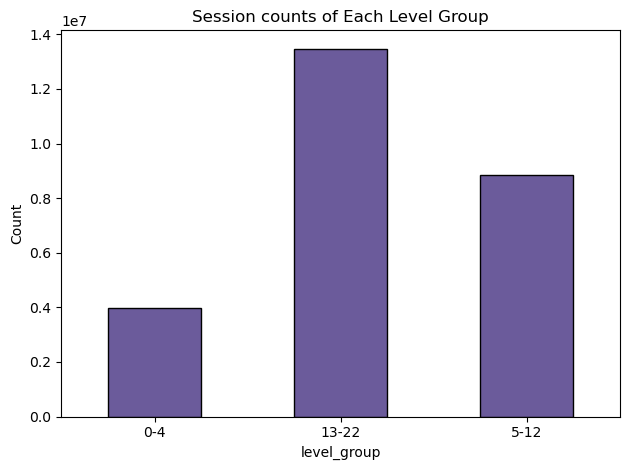

In [11]:
df_train.groupby(by="level_group")["level_group"].value_counts().plot(kind='bar', color='#6b5b9b', edgecolor='black')
plt.xlabel('level_group')
plt.ylabel('Count')
plt.title('Session counts of Each Level Group')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

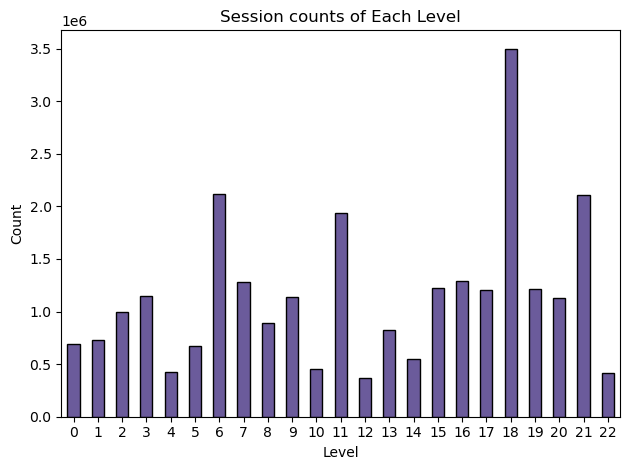

In [12]:
df_train.groupby(by="level")["level"].value_counts().plot(kind='bar', color='#6b5b9b', edgecolor='black')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Session counts of Each Level')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

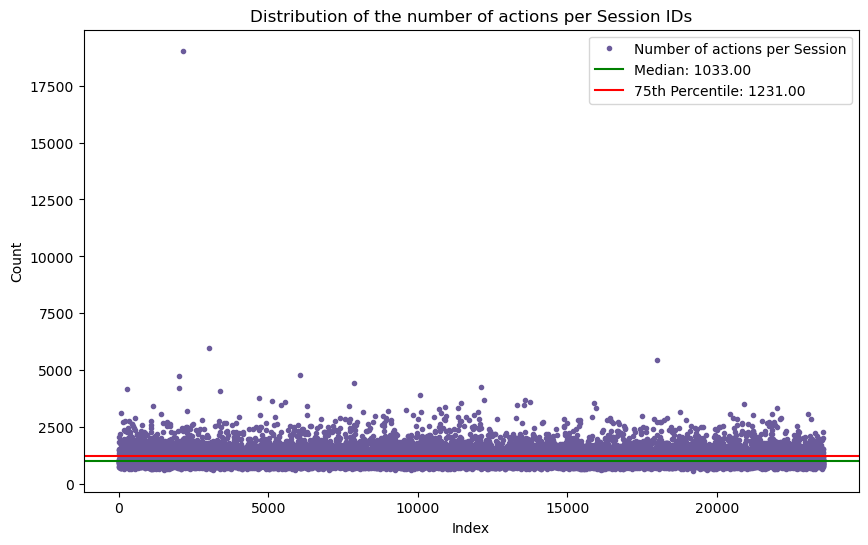

In [13]:
session_id_counts = df_train.groupby(by="session_id")["session_id"].value_counts()
session_id_counts = session_id_counts.reset_index()
session_id_counts.columns = ['session_id', 'count']

plt.figure(figsize=(10, 6))
plt.plot(session_id_counts.index, session_id_counts['count'], marker='.', linestyle='', markersize=6, color='#6b5b9b', label=f'Number of actions per Session')

# Plot median
median_value = session_id_counts['count'].median()
plt.axhline(y=median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')

# Plot 75th percentile
percentile_75 = np.percentile(session_id_counts['count'], 75)
plt.axhline(y=percentile_75, color='red', linestyle='-', label=f'75th Percentile: {percentile_75:.2f}')

plt.title('Distribution of the number of actions per Session IDs')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Categorical features histogram

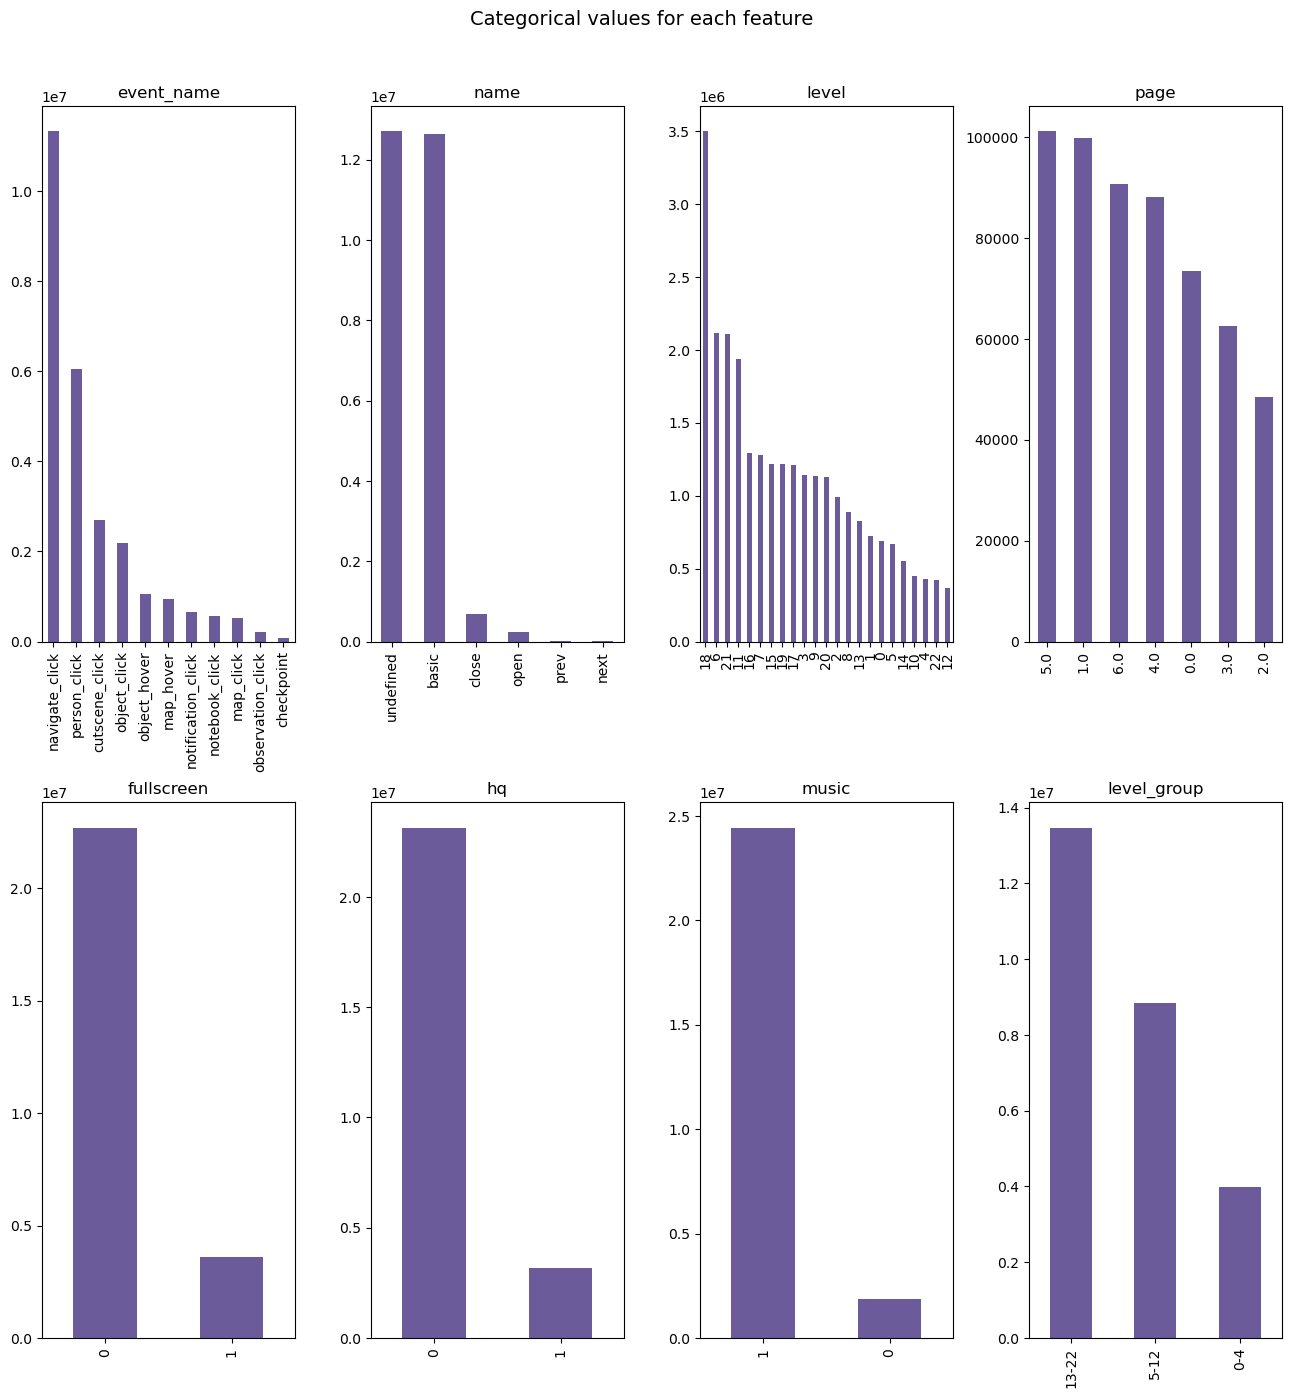

In [14]:
plt.figure(figsize=(16, 16))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle("Categorical values for each feature", fontsize=14, y=0.94)
for n, c_col in enumerate(CATEGORICAL_COLS):
    n = n+1
    ax = plt.subplot(2, 4, n)
    plot_df = df_train[c_col].value_counts()
    # plot_df = pd.DataFrame({'correct': [plot_df.get(1, 0)], 'incorrect': [plot_df.get(0, 0)]})
    plot_df.plot(ax=ax, kind="bar", color='#6b5b9b')
    ax.set_title(c_col)
    ax.set_xlabel("")

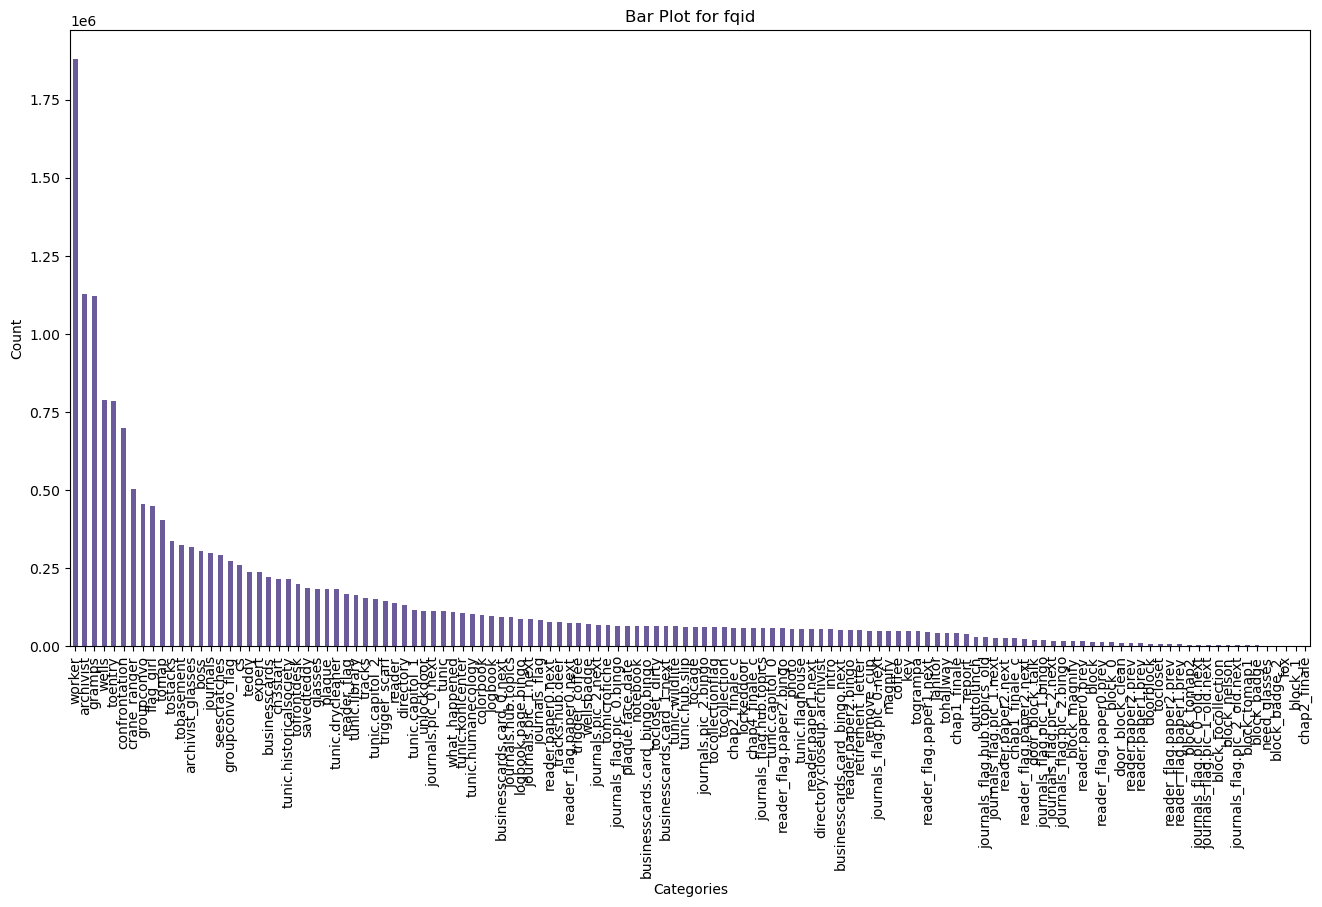

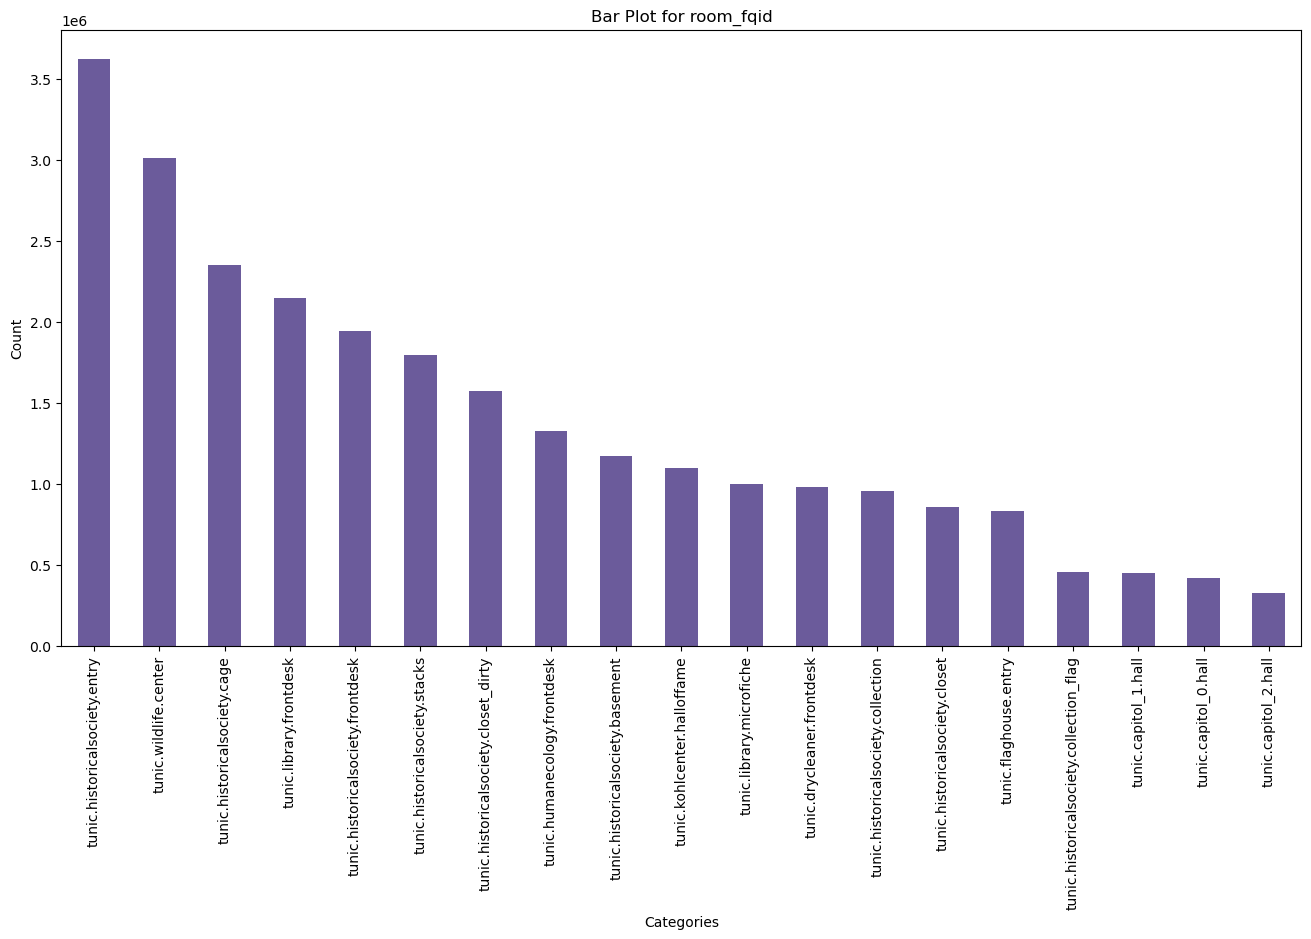

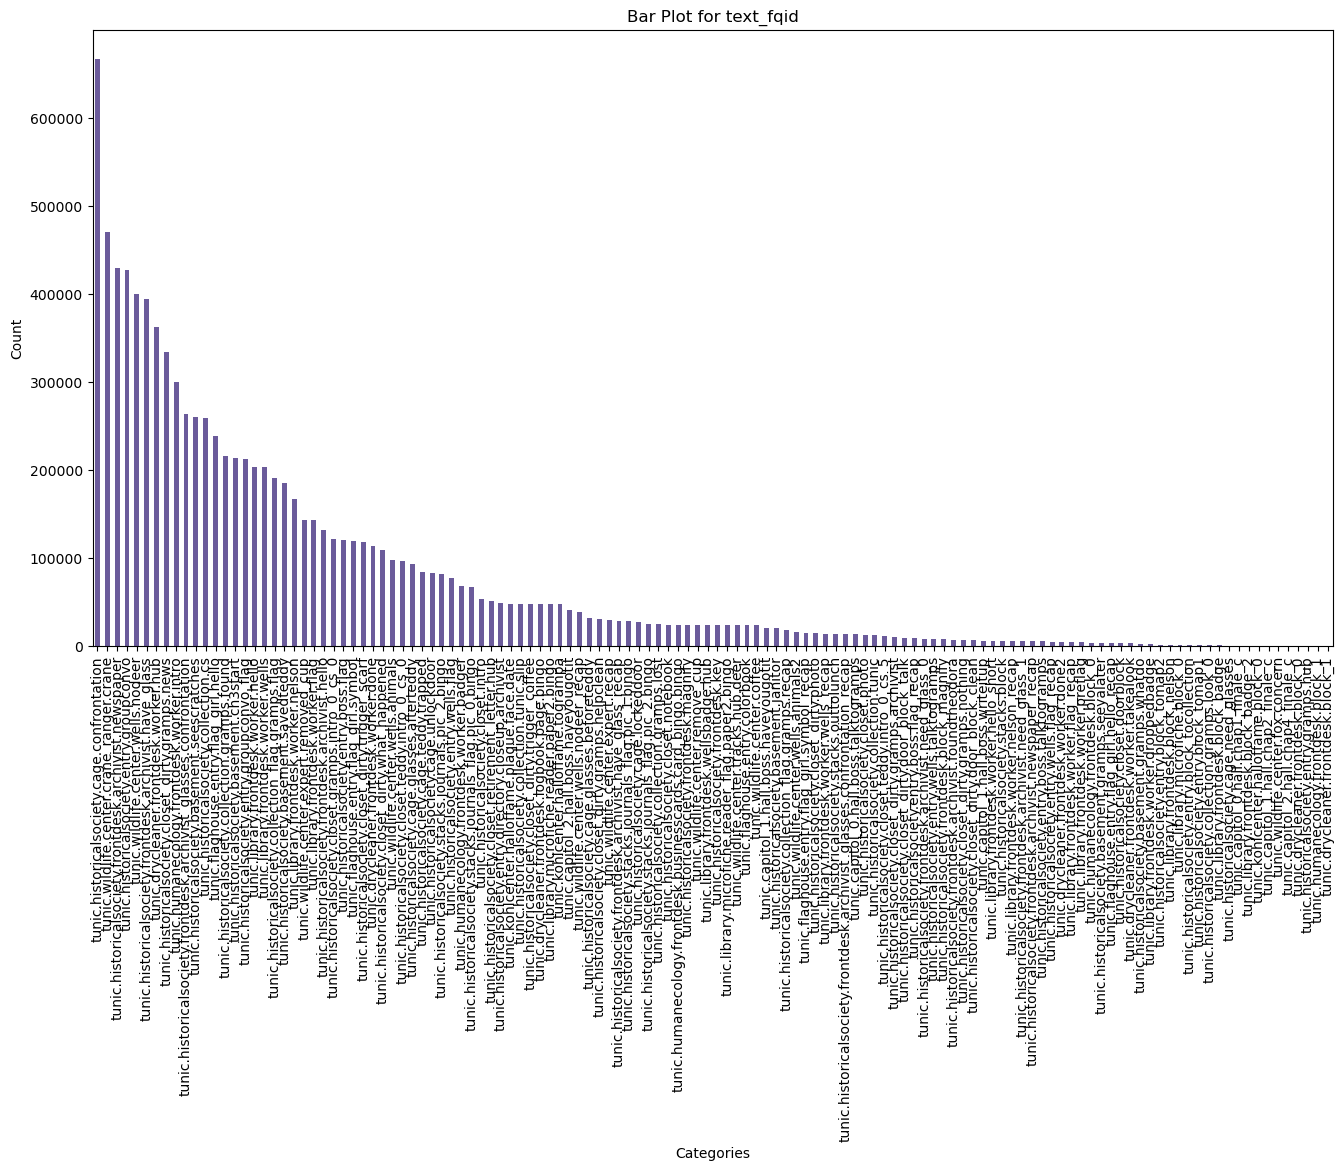

In [15]:
for n, c_col in enumerate(ID_CATEGORICAL_COLS):
    plt.figure(figsize=(16, 8))

    # Create new axes for each plot
    ax = plt.subplot(1, 1, 1)

    plot_df = df_train[c_col].value_counts()
    plot_df.plot(ax=ax, kind="bar", color='#6b5b9b')
    plt.title(f'Bar Plot for {c_col}')  # Add title for each plot
    plt.xlabel('Categories')  # Add x-axis label
    plt.ylabel('Count')  # Add y-axis label
    plt.show()

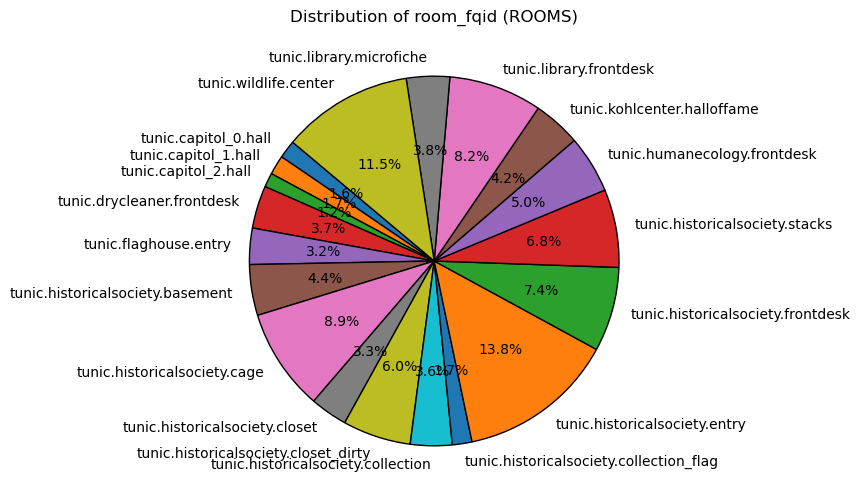

In [16]:
room_fqid_counts = df_train.groupby("room_fqid").size()

# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(room_fqid_counts, labels=room_fqid_counts.index, autopct='%1.1f%%',
         startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of room_fqid (ROOMS)')
plt.show()

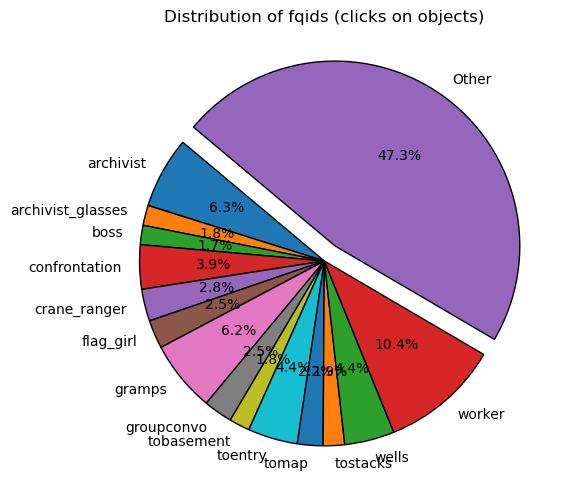

In [17]:
import matplotlib.pyplot as plt

# Grouping by fqid and counting occurrences
fqid_counts = df_train.groupby("fqid").size()

# Threshold for "Other" category (2%)
threshold = 300000

# Filter out counts below threshold
small_counts = fqid_counts[fqid_counts < threshold]

# Combine small counts into "Other" category
other_count = small_counts.sum()
fqid_counts = fqid_counts[fqid_counts >= threshold]
fqid_counts['Other'] = other_count

# Plotting a pie chart
explode = [0.1 if label == 'Other' else 0 for label in fqid_counts.index]
plt.figure(figsize=(10, 6))
plt.pie(fqid_counts, labels=fqid_counts.index, autopct='%1.1f%%', explode=explode,
         startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of fqids (clicks on objects)')
plt.show()

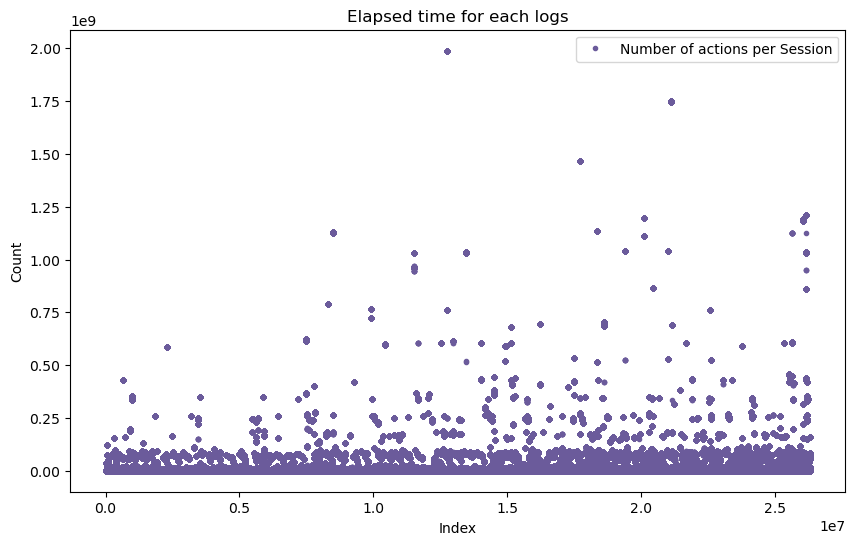

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df_train["elapsed_time"], marker='.', linestyle='', markersize=6, color='#6b5b9b', label=f'Number of actions per Session')

plt.title('Elapsed time for each logs')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


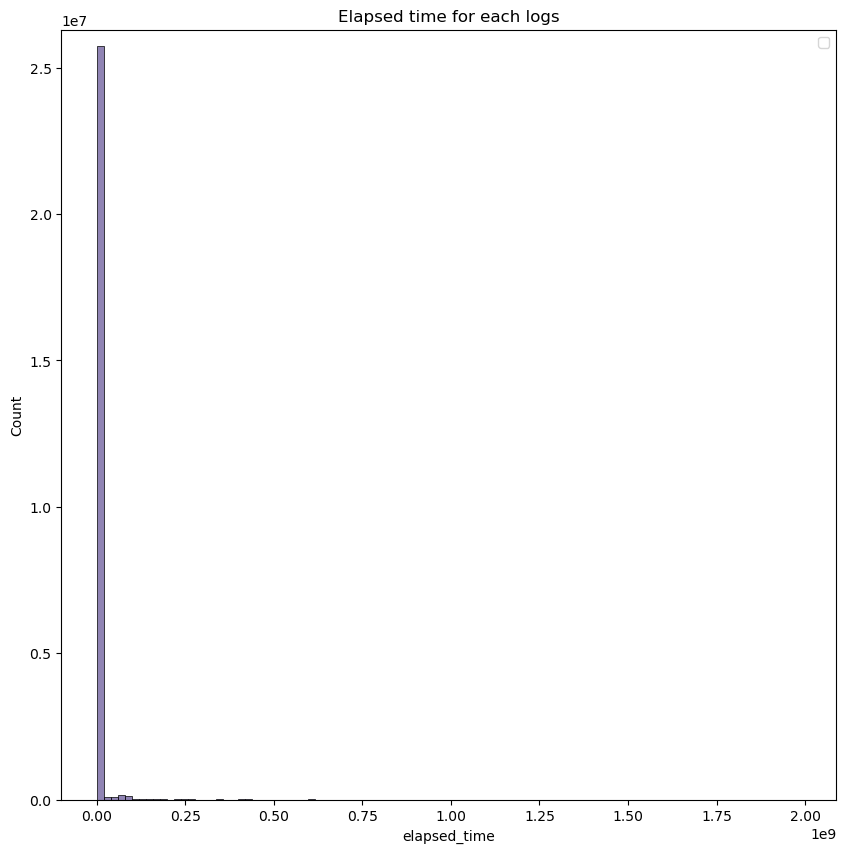

In [19]:
plt.figure(figsize=(10, 10))
sns.histplot(df_train["elapsed_time"], bins=100, color='#6b5b9b')
plt.ylim(top=df_train["elapsed_time"].shape[0])  # Set the maximum value of the y-axis
plt.title('Elapsed time for each logs')
plt.ylabel('Count')
plt.legend()
plt.show()

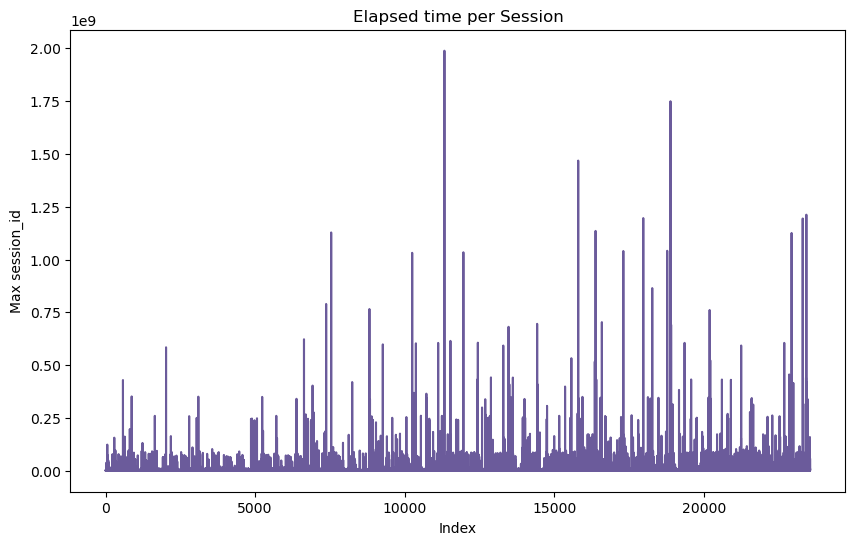

In [20]:
session_id_max = df_train.groupby(by="session_id")["elapsed_time"].max()
session_id_max = session_id_max.reset_index()
session_id_max.columns = ['session_id', 'max']

plt.figure(figsize=(10, 6))
plt.plot(session_id_max.index, session_id_max['max'], color='#6b5b9b')
plt.xlabel('Index')
plt.ylabel('Max session_id')
plt.title('Elapsed time per Session')
plt.show()

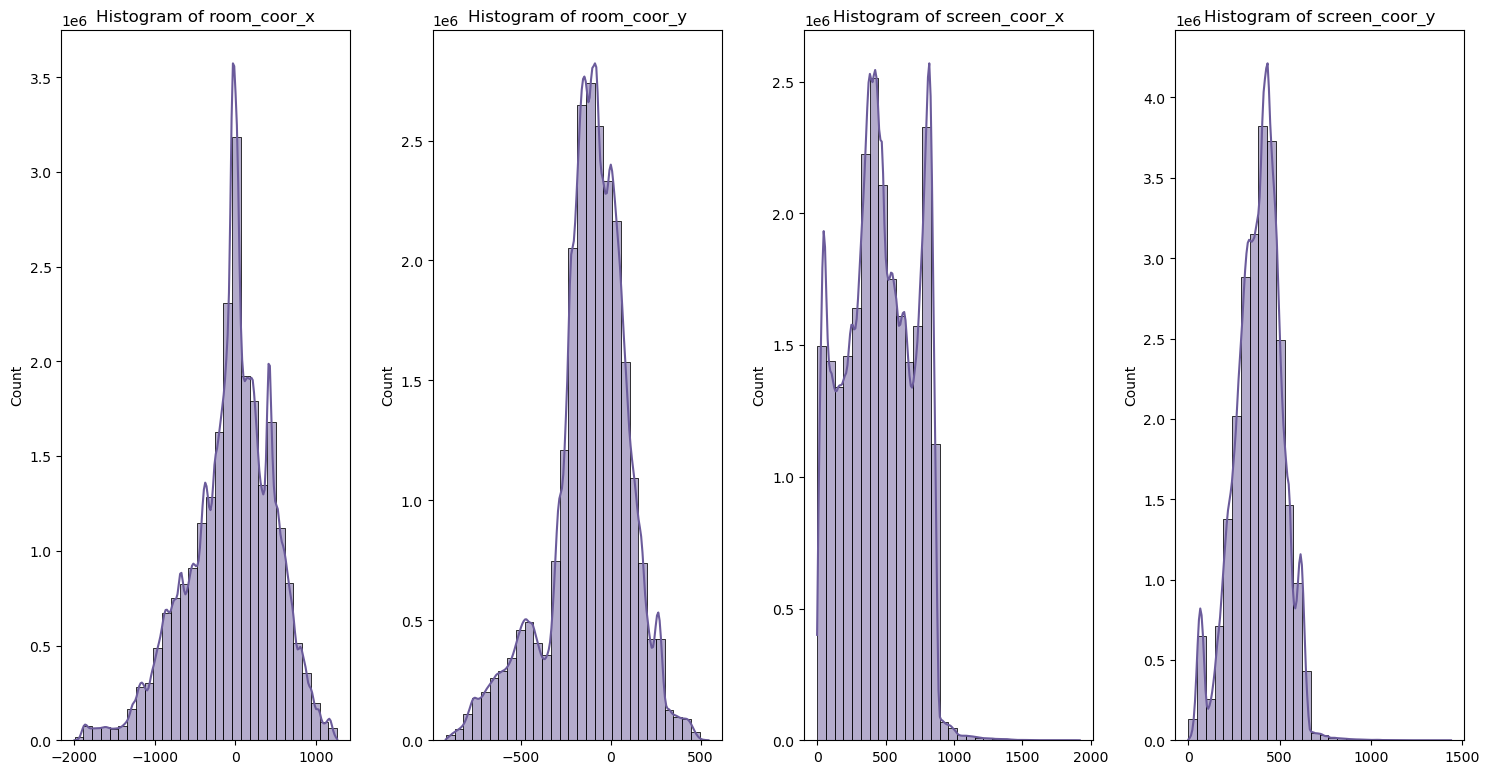

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 8))
axes = axes.flatten()
for i, variable in enumerate(['room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y']):
    sns.histplot(df_train[variable], bins=30, kde=True, ax=axes[i], color='#6b5b9b')
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel('') 

plt.tight_layout()
plt.show()

Number of rooms: 19
### ROOM 1: tunic.historicalsociety.closet


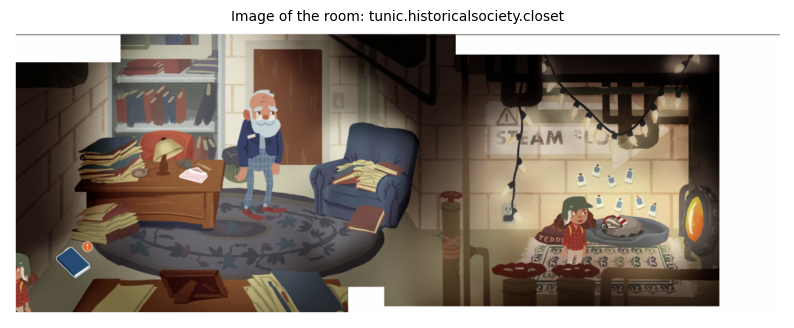

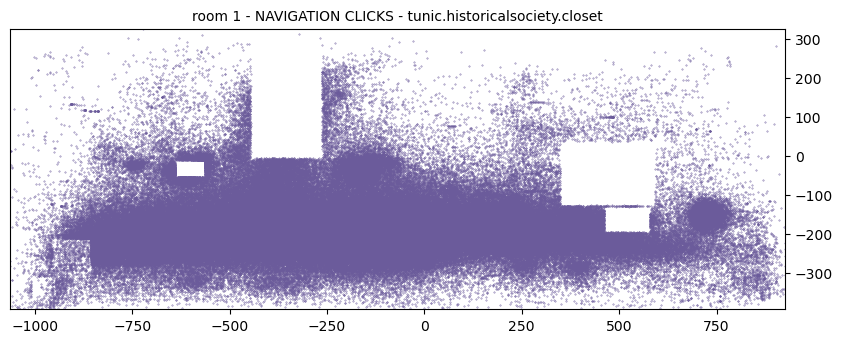

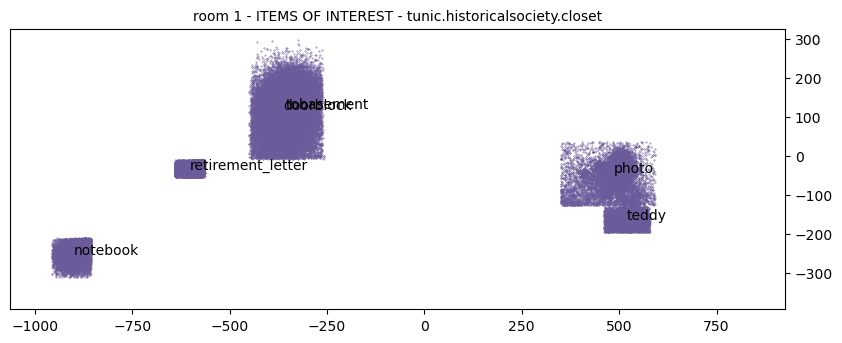

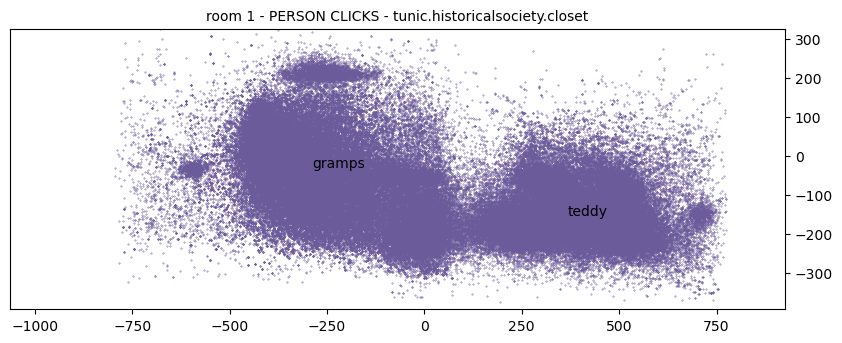

In [23]:
# code based on: https://www.kaggle.com/code/cdeotte/game-room-click-eda

ROOMS = df_train.room_fqid.unique()
print('Number of rooms:', len(ROOMS) )

print(f'### ROOM {1}:', ROOMS[0])

plt.figure(figsize=(10,6))
plt.imshow(plt.imread('./images/room1.png'))
plt.title(f'Image of the room: {ROOMS[0]}',size=10)

plt.axis('off')
plt.show()

# DISPLAY NAVIGATION CLICKS
df = df_train.loc[(df_train.event_name=='navigate_click')
                &(df_train.room_fqid==ROOMS[0]) & (df_train.fqid.isna())]
x_min,y_min = df[['room_coor_x','room_coor_y']].min().values
x_max,y_max = df[['room_coor_x','room_coor_y']].max().values
plt.figure(figsize=(10, 6))
plt.scatter(df.room_coor_x, df.room_coor_y, s=0.1, color='#6b5b9b')
plt.xlim((x_min,x_max))
plt.ylim((y_min,y_max))
plt.gca().set_aspect('equal')
plt.title(f'room {1} - NAVIGATION CLICKS - {ROOMS[0]}',size=10)
plt.gca().yaxis.tick_right()
plt.show()


# DISPLAY ITEMS OF INTEREST
df = df_train.loc[(df_train.event_name=='navigate_click')
                &(df_train.room_fqid==ROOMS[0])&(df_train.fqid.notna())]
ITEMS = df.fqid.unique()
plt.figure(figsize=(10, 6))
plt.scatter(df.room_coor_x, df.room_coor_y, s=0.1, color='#6b5b9b')
for i in ITEMS:
    mns = df.loc[df.fqid==i,['room_coor_x','room_coor_y']].mean().values
    plt.text(mns[0], mns[1], i, fontsize=10)
plt.xlim((x_min,x_max))
plt.ylim((y_min,y_max))
plt.gca().set_aspect('equal')
plt.title(f'room {1} - ITEMS OF INTEREST - {ROOMS[0]}',size=10)
plt.gca().yaxis.tick_right()
plt.show()


# DISPLAY PERSON CLICKS
df = df_train.loc[(df_train.event_name=='person_click')
                &(df_train.room_fqid==ROOMS[0])&(df_train.fqid.notna())]
if len(df)!=0:
    ITEMS = df.fqid.unique()
    plt.figure(figsize=(10,6))
    plt.scatter(df.room_coor_x, df.room_coor_y, s=0.1, color='#6b5b9b')
    for i in ITEMS:
        mns = df.loc[df.fqid==i,['room_coor_x','room_coor_y']].mean().values
        plt.text(mns[0],mns[1],i,fontsize=10)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))
    plt.gca().set_aspect('equal')
    plt.title(f'room {1} - PERSON CLICKS - {ROOMS[0]}',size=10)
    plt.gca().yaxis.tick_right()
    plt.show()

### Reading the train labels

In [24]:
train_labels = pd.read_csv(FOLDERPATH + "train_labels.csv")
print(f"Loading {train_labels.shape[0]} labels.")

Loading 424116 labels.


In [25]:
print(f"Preprocessing session IDs...")

train_labels['session'] = train_labels.session_id.apply(lambda x: int(x.split('_')[0]) )
train_labels['q'] = train_labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )
train_labels.head(5)

Preprocessing session IDs...


,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


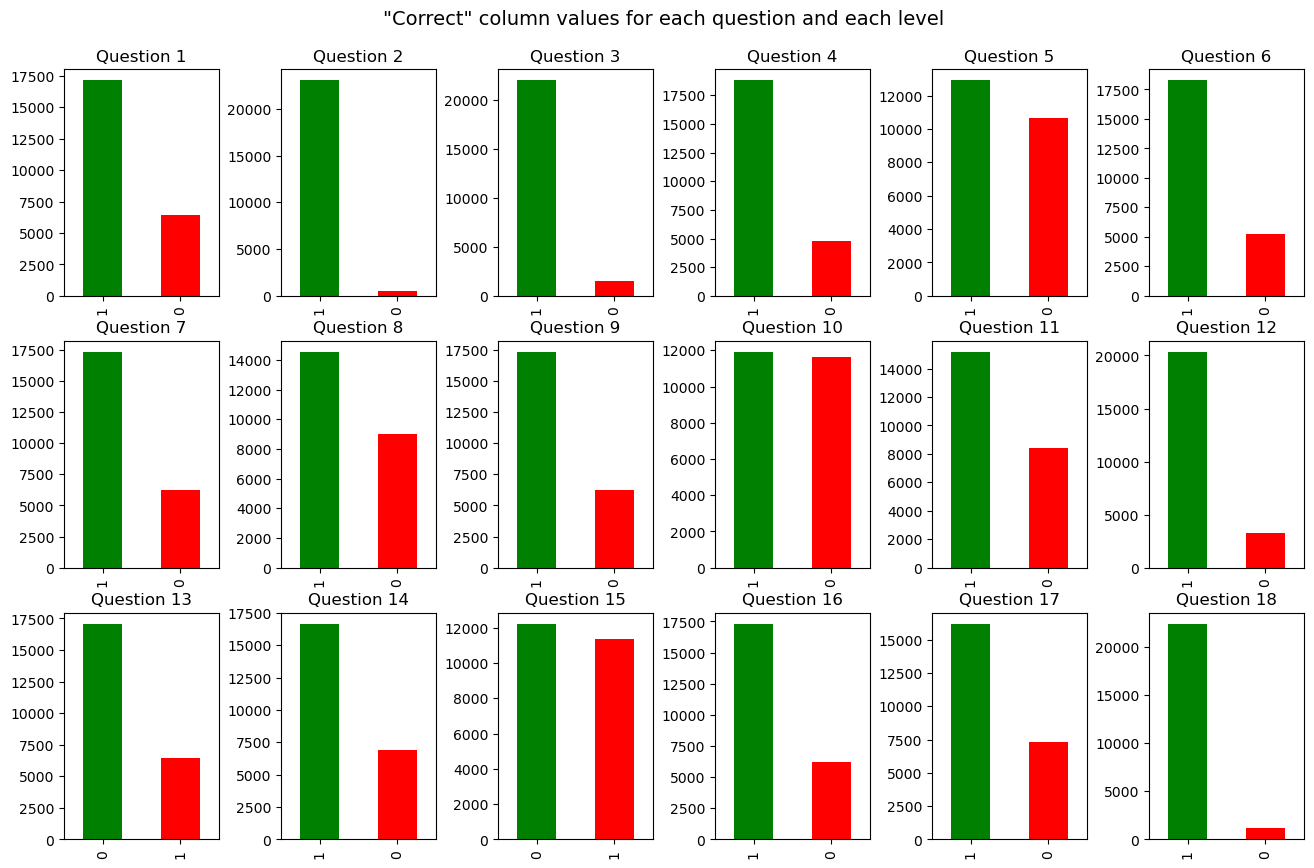

In [26]:
plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=0.4)
plt.suptitle("\"Correct\" column values for each question and each level", fontsize=14, y=0.94)
for n in range(1,19):
    ax = plt.subplot(3, 6, n)
    plot_df = train_labels.loc[train_labels.q == n]
    plot_df = plot_df.correct.value_counts()
    # plot_df = pd.DataFrame({'correct': [plot_df.get(1, 0)], 'incorrect': [plot_df.get(0, 0)]})
    plot_df.plot(ax=ax, kind="bar", color=['g', 'r'])
    ax.set_title("Question " + str(n))
    ax.set_xlabel("")

### Labels for one ID

In [27]:
labels = train_labels[train_labels["session"] == 20090312431273200]
labels.head(10)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
23562,20090312431273200_q2,1,20090312431273200,2
47124,20090312431273200_q3,1,20090312431273200,3
70686,20090312431273200_q4,1,20090312431273200,4
94248,20090312431273200_q5,1,20090312431273200,5
117810,20090312431273200_q6,1,20090312431273200,6
141372,20090312431273200_q7,1,20090312431273200,7
164934,20090312431273200_q8,1,20090312431273200,8
188496,20090312431273200_q9,1,20090312431273200,9
212058,20090312431273200_q10,1,20090312431273200,10
